In [18]:
# Create EDA using Test Data file(Yoshops.com Sale Order file) :
# Input Value for genrate Graph chart:
# Enter 1 to see the analysis of Reviews given by Customers
# Enter 2 to see the analysis of different payment methods used by the Customers
# Enter 3 to see the analysis of Top Consumer States of India
# Enter 4 to see the analysis of Top Selling Product Categories
# Enter 5 to see the analysis of Number of Orders Across Parts of a Day

# Enter the number to see the analysis of your choice: 1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
#Reading/Importing dataset
orderData = pd.read_csv("orders.csv")
reviewData = pd.read_csv("review.csv")

In [5]:
#Analysis of reviews given by customers

def choice1():
    reviewData.dropna(subset=['stars'], inplace=True)
    # Define a regular expression to extract the numeric part of the star rating
    pattern = r'(\d\.\d)'
    # Apply the regular expression to the 'stars' column and extract the numeric part
    reviewData['stars'] = reviewData['stars'].astype(str)
    reviewData['stars'] = reviewData['stars'].apply(lambda x: re.findall(pattern, x)[0]).astype(float)

    reviewData['stars'] = pd.to_numeric(reviewData['stars'])

    plt.hist(reviewData['stars'])
    plt.xlabel('Star Rating')
    plt.ylabel('Count')
    plt.title('Distribution of Star Ratings')
    plt.show()


    avg_stars = reviewData.groupby('category')['stars'].mean().sort_values()
    fig, ax = plt.subplots(figsize=(8, 15))
    ax.barh(avg_stars.index, avg_stars.values)
    ax.set_xlabel('Average star rating')
    ax.set_ylabel('Category')
    ax.set_title('Average star rating by category')
    plt.subplots_adjust(left=0.3)
    plt.show()

In [10]:
#Analysis of different payment methods used by the Customers

def choice2():
    filtered = orderData['Payment Method'].dropna()
    split = filtered.str.split().str.get(0)
    #finding unique modes available for payment
    unique_modes = split.unique()
    print("Different modes available for payment : ",unique_modes)

    #counting payments done in each category
    payment_method_counts = split.value_counts()

    print("\nNumber of payments done by Offline mode: ",payment_method_counts[0])
    print("Number of payments done by CCAvenue mode: ",payment_method_counts[1])

    plt.pie(payment_method_counts,labels=payment_method_counts)

In [11]:
#Analysis of Top Consumer States of India

def choice3():
    states = orderData['Shipping State']
    #Retreiving top 10 consumer states
    topStates = states.value_counts().head(10)
    print("Top 10 consumer states are :\n",topStates)

    #Plotting bar plot
    plt.bar(topStates.index, topStates.values)
    plt.xlabel('Shipping State')
    plt.ylabel('Count')
    plt.title('Top 10 Shipping States')
    plt.show()

In [12]:
#Analysis of top reviewed product category and service cities

def choice4():
    topCategories = reviewData['category'].value_counts().head(10)
    # create a scatter plot
    plt.scatter(topCategories.index, topCategories.values)

    # adjust x-axis labels
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.15)

    # add axis labels and title
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title('Top Product Categories')

    # show the plot
    plt.show()

In [13]:
#Analysis of Number of Orders Across Parts of a Day

def choice5():
    # Load the data into a pandas DataFrame
    df = orderData

    # Extract the hour from the "Order Date and Time Stamp" column
    df['Hour'] = pd.to_datetime(df['Order Date and Time Stamp']).dt.hour

    # Categorize the hours into ranges of 3 hours
    df['Hour Range'] = pd.cut(df['Hour'], bins=range(0, 25, 3), labels=['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24'])

    # Group the data by hour range and count the number of occurrences
    counts = df.groupby('Hour Range').size().reset_index(name='Count')

    # Create a bar plot of the counts by hour range
    plt.bar(counts['Hour Range'], counts['Count'])
    plt.xlabel('Hour Range')
    plt.ylabel('Count')
    plt.show()

Enter the number between 1 to 5 to see the analysis of your choice: 5


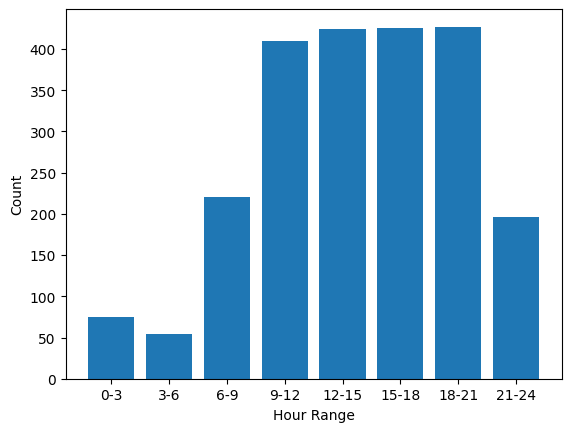

In [17]:
#Output according to user input
choice = int(input("Enter the number between 1 to 5 to see the analysis of your choice: "))
if(choice == 1):
    choice1()
if(choice == 2):
    choice2()
if(choice == 3):
    choice3()
if(choice == 4):
    choice4()
if(choice == 5):
    choice5()